We are going to learn how to develop clustering models. In machine learning, this type of model is used when we want to classify our data in an unsupervised manner. Unlike supervised learning models, where we train the model on labeled data, clustering involves grouping data points based solely on their similarities without any concern for a "correct" or "incorrect" class.

### Clustering in Machine Learning

Clustering is a fundamental task in unsupervised learning, where the objective is to partition a dataset into groups, or clusters, such that data points within the same cluster are more similar to each other than to those in other clusters. This is particularly useful in scenarios where we do not have labeled data but want to discover inherent structures or patterns within the data.

#### Key Concepts in Clustering

1. **Unsupervised Learning**:
   - Clustering falls under the category of unsupervised learning, where the data comes without any labels. The goal is to find natural groupings within the data.

2. **Clusters**:
   - A cluster is a group of data points that share similar characteristics. Ideally, the data points in the same cluster should be closer to each other in the feature space, while points in different clusters should be farther apart.

3. **Similarity Metrics**:
   - Clustering algorithms rely on similarity or distance metrics to group data points. Common metrics include Euclidean distance, Manhattan distance, and cosine similarity.

4. **Types of Clustering**:
   - **Hard Clustering**: Each data point belongs to exactly one cluster. Example: K-Means Clustering.
   - **Soft Clustering**: A data point can belong to multiple clusters with certain probabilities. Example: Gaussian Mixture Models.

5. **Applications of Clustering**:
   - **Customer Segmentation**: Grouping customers based on purchasing behavior for targeted marketing.
   - **Document Classification**: Organizing a large set of documents into topics or themes.
   - **Image Segmentation**: Dividing an image into regions or objects for image analysis.
   - **Anomaly Detection**: Identifying unusual patterns that do not fit into any cluster.

#### Popular Clustering Algorithms

Among the many clustering algorithms available, we will focus on **K-Means Clustering**, by far the most popular and easy to understand.

### K-Means Clustering

K-Means is a simple yet powerful clustering algorithm that partitions a dataset into $k$ clusters. The algorithm aims to minimize the variance within each cluster, thereby ensuring that data points in the same cluster are as similar as possible.

#### How K-Means Works:

1. **Initialization**:
   - Choose $k$, the number of clusters.
   - Randomly initialize $k$ centroids, which represent the centers of the clusters.

2. **Assignment Step**:
   - Assign each data point to the nearest centroid based on the chosen distance metric (usually Euclidean distance). Each data point is now associated with one of the $k$ clusters.

3. **Update Step**:
   - Recompute the centroids as the mean of all data points assigned to each cluster.

4. **Repeat**:
   - Repeat the assignment and update steps until the centroids no longer change significantly, or a maximum number of iterations is reached.

5. **Convergence**:
   - The algorithm converges when the centroids stabilize and do not change much between iterations, resulting in the final clusters.

#### Advantages of K-Means:

- **Simplicity**: Easy to implement and understand.
- **Scalability**: Efficient for large datasets, especially when $k$ is small.
- **Speed**: Converges quickly, making it suitable for time-sensitive tasks.

#### Limitations of K-Means:

- **Predefined Number of Clusters**: The number of clusters $k$ must be specified beforehand, which may not always be intuitive.
- **Sensitivity to Initialization**: Different initializations can lead to different results.
- **Not Suitable for Non-Spherical Clusters**: Assumes that clusters are spherical and equally sized, which may not hold in real-world data.

#### Example of K-Means Clustering:

Let’s consider a basic implementation of K-Means in Python using the `sklearn` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

To demonstrate the effectiveness of the elbow method, we will generate a dataset with a random number of clusters. This number will be unknown to us, and we will have to discover it using the elbow method.

In [2]:
k = np.random.choice([2,3,4,5,6,7,8,9,10])

X, _ = make_blobs(n_samples=200, centers=k, n_features=2,cluster_std=0.5)

/Users/gth/anaconda3/envs/ml-algo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gth/anaconda3/envs/ml-algo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gth/anaconda3/envs/ml-algo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gth/anaconda3/envs/ml-algo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

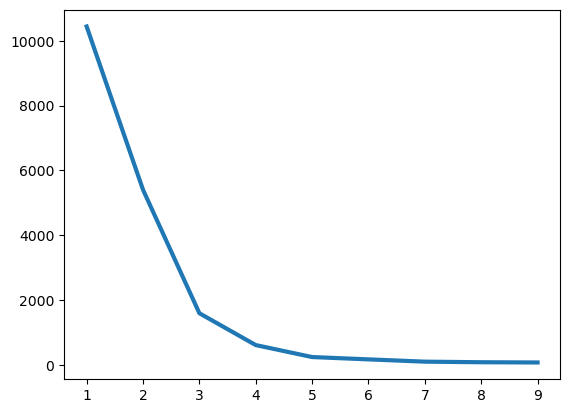

In [3]:
k_range = range(1,10)
k_inertias = []

for k in k_range:
    model = KMeans(n_clusters=k).fit(X)
    k_inertias.append(model.inertia_)

plt.plot(k_range, k_inertias, lw=3)
plt.show()

The resulting graph from this experiment appears to show an inflection point for the value of **K = 5.**

We'll therefore create our KMeans model with 5 clusters.

In [10]:
model = KMeans(n_clusters=5)
model.fit(X)
predictions = model.predict(X)


/Users/gth/anaconda3/envs/ml-algo/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


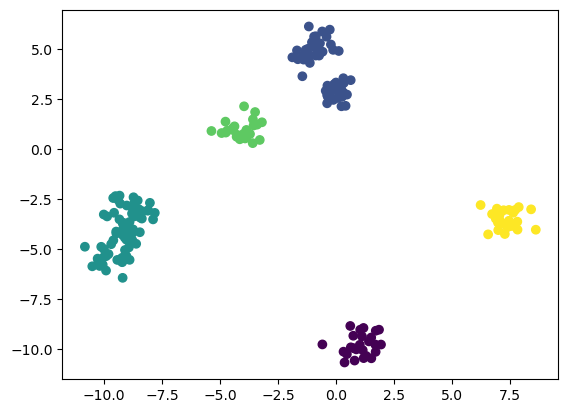

In [11]:
plt.scatter(X[:,0], X[:,1], c=predictions)
plt.show()

It appears there are five distinct groups of points, which corresponds to 5 clusters.